# COMP 352 Final Project - Banana Quality

**Authors:** Precee Ginigeme, Kieran Kennedy, Evan Scott

**Date:** 12/17/2024

### Banana Quality Dataset

#### Full dataset: https://www.kaggle.com/datasets/mrmars1010/banana-quality-dataset

The Banana Quality Dataset includes comprehensive attributes of bananas categorized into quality classes such as "Good," "Processing," and "Premium." Key features encompass measurements like size, weight, firmness, and other relevant parameters that influence banana quality. Analyzing the data can help reduce food waste, enhance supply chain efficiency, and improve consumer satisfaction by enabling accurate quality classification. 

## Table of Contents:
* [Data Importing and Pre-processing](#data-importing)
* [Data Analysis and Visualization](#data-vis)
* [Data Analytics](#data-analytics)

## Data Importing and Pre-processing <a class="anchor" id="data-importing"></a>

- Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used
- Clean, wrangle, and handle missing data
- Encode any categorical variables
- Perform feature engineering on the dataset
- Transform data appropriately using techniques such as aggregation, normalization, and feature construction
- Reduce redundant data and perform need based discretization

- Imports

In [1]:
#importing libraries needed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

from sklearn.inspection import permutation_importance
from sklearn.metrics import ConfusionMatrixDisplay

from pandas.plotting import scatter_matrix

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif


In [2]:
#read in file
banana_df = pd.read_csv("banana_quality_dataset.csv")

- Describing information about the dataset

In [3]:
#information about the dataset

print(f"Shape of Banana Dataset (rows, cols): {banana_df.shape} ")

# count the number of categorical variables
cat_count = 0
for dtype in banana_df.dtypes:
    if dtype == "object":
        cat_count = cat_count + 1


print("Number of categorical variables:", cat_count)

numeric_vars = banana_df.shape[1] - cat_count - 1
print(
    "Number of continuous variables:", numeric_vars
)  # subtract and extra column because one of the columns is an ID column


Shape of Banana Dataset (rows, cols): (1000, 16) 
Number of categorical variables: 5
Number of continuous variables: 10


In [4]:
banana_df.head()

,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
0,1,Manzano,Colombia,1.88,Processing,2.11,Turning,16.83,3.53,21.44,146.92,2023-10-16,13.7,58.2,2440.5,183.6
1,2,Plantain,Guatemala,2.42,Processing,4.25,Ripe,16.73,4.09,26.11,160.48,2023-10-14,5.1,280.2,2374.6,109.8
2,3,Burro,Ecuador,3.57,Premium,6.24,Overripe,21.34,1.63,25.20,225.27,2023-09-08,17.7,1246.9,1191.5,147.7
3,4,Manzano,Ecuador,2.21,Processing,5.39,Ripe,16.75,3.31,13.08,137.80,2023-10-07,13.0,1150.2,2845.1,92.8
4,5,Red Dacca,Ecuador,2.35,Processing,5.84,Ripe,16.90,3.07,12.98,227.84,2023-10-02,4.8,526.0,2136.9,129.7


Dropping the quality_score column is necessary to avoid data leakage because the quality_category column, which is our target variable, appears to be a bucketed version of quality_score. Including quality_score as a feature in the model could lead to unrealistic predictions, as it directly informs the model about the target variable, thereby contaminating the training process. This would result in an unfair advantage and would distort the model's performance. Additionally, removing duplicates and redundant columns is an essential part of the data cleaning process, ensuring that the model is trained on meaningful and non-repetitive information, improving both efficiency and accuracy.

In [5]:
#Dropping "Quality Score" column to avoid data leakage

banana_df = banana_df.drop(columns=["quality_score"])
banana_df.head()

,sample_id,variety,region,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
0,1,Manzano,Colombia,Processing,2.11,Turning,16.83,3.53,21.44,146.92,2023-10-16,13.7,58.2,2440.5,183.6
1,2,Plantain,Guatemala,Processing,4.25,Ripe,16.73,4.09,26.11,160.48,2023-10-14,5.1,280.2,2374.6,109.8
2,3,Burro,Ecuador,Premium,6.24,Overripe,21.34,1.63,25.20,225.27,2023-09-08,17.7,1246.9,1191.5,147.7
3,4,Manzano,Ecuador,Processing,5.39,Ripe,16.75,3.31,13.08,137.80,2023-10-07,13.0,1150.2,2845.1,92.8
4,5,Red Dacca,Ecuador,Processing,5.84,Ripe,16.90,3.07,12.98,227.84,2023-10-02,4.8,526.0,2136.9,129.7


In [6]:
#amount of missing values in the dataset
total = banana_df.isnull().sum().sort_values(ascending=False)
percent = (banana_df.isnull().sum() / banana_df.isnull().count()).sort_values(
    ascending=False
)
missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
missing_data.head(20)

,Total,Percent
sample_id,0,0.0
variety,0,0.0
region,0,0.0
quality_category,0,0.0
ripeness_index,0,0.0
ripeness_category,0,0.0
sugar_content_brix,0,0.0
firmness_kgf,0,0.0
length_cm,0,0.0
weight_g,0,0.0


Upon inspection of the dataset, it was confirmed that there are no null or missing values present across any of the columns. This means that the dataset is already complete and there is no need for null imputation. Since this dataset is fully populated, we can proceed without concern for introducing bias or inaccuracies through imputation methods. The absence of null values simplifies the preprocessing pipeline and ensures that our model training will be based on complete, clean data.

Encoding the categorical varaibles and doing feature engineering

In [7]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
cleaned_banana_df = banana_df.copy() #Making a copy to encode data and give to models

# Encode the 'quality_category' column, our target variable
cleaned_banana_df['quality_category'] = label_encoder.fit_transform(banana_df['quality_category'])


In [8]:
# Label encoding for 'ripeness_category'
cleaned_banana_df['ripeness_category'] = label_encoder.fit_transform(banana_df['ripeness_category'])

# Label encoding for 'region'
cleaned_banana_df['region'] = label_encoder.fit_transform(banana_df['region'])

# Label encoding for 'date' (extracting year, month, and day)
# Convert 'date' to datetime
cleaned_banana_df['harvest_date'] = pd.to_datetime(banana_df['harvest_date'])

# Label encoding for 'variety'
cleaned_banana_df['variety'] = label_encoder.fit_transform(banana_df['variety'])

# Check the changes in the dataframe
cleaned_banana_df.head()

,sample_id,variety,region,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
0,1,5,1,2,2.11,3,16.83,3.53,21.44,146.92,2023-10-16,13.7,58.2,2440.5,183.6
1,2,6,4,2,4.25,2,16.73,4.09,26.11,160.48,2023-10-14,5.1,280.2,2374.6,109.8
2,3,1,3,1,6.24,1,21.34,1.63,25.20,225.27,2023-09-08,17.7,1246.9,1191.5,147.7
3,4,5,3,2,5.39,2,16.75,3.31,13.08,137.80,2023-10-07,13.0,1150.2,2845.1,92.8
4,5,7,3,2,5.84,2,16.90,3.07,12.98,227.84,2023-10-02,4.8,526.0,2136.9,129.7



Label encoding was particularly beneficial for this specific dataset because it allowed us to convert the categorical variables into a format that could be effectively used by machine learning algorithms. For the ripeness_category, region, and variety columns, these features represent non-numeric, discrete categories that play a role in predicting the quality of bananas. Label encoding ensures that each unique category is mapped to a specific numeric value, making it easier for the model to process and learn from these features.

The harvest_date column, which represents the time a banana was harvested, was converted to a datetime type to facilitate the extraction of time-based features (year, month, day). This is particularly useful for a dataset like this, where time might have an impact on banana quality (e.g., seasonal variations). By extracting these temporal components, we can more effectively model and understand the influence of time on banana quality.

Overall, label encoding and datetime conversion were effective choices for this dataset because they transformed categorical and time-based features into formats suitable for predictive modeling, improving the ability to identify patterns in the data

In [9]:
# now recount the number of categorical variables
cat_count = 0
for dtype in cleaned_banana_df.dtypes:
    if dtype == "object":
        cat_count = cat_count + 1


print("After encoding, Number of categorical variables:", cat_count)

After encoding, Number of categorical variables: 0


Since we are working on a classification problem with the target variable being quality_category, normalization of the target variable is not necessary. The quality_category is a categorical variable, and normalization is typically applied to continuous numerical features to ensure they are on a similar scale.

Removing outliers in a classification problem is not always necessary and should only be considered if they significantly affect the model’s performance. Some outliers may represent natural variations in the population, and removing them could result in losing valuable information. Therefore, we elected to not remove any outliers because they do not significantly affect the data.

In [10]:
cleaned_banana_df.head()

,sample_id,variety,region,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
0,1,5,1,2,2.11,3,16.83,3.53,21.44,146.92,2023-10-16,13.7,58.2,2440.5,183.6
1,2,6,4,2,4.25,2,16.73,4.09,26.11,160.48,2023-10-14,5.1,280.2,2374.6,109.8
2,3,1,3,1,6.24,1,21.34,1.63,25.20,225.27,2023-09-08,17.7,1246.9,1191.5,147.7
3,4,5,3,2,5.39,2,16.75,3.31,13.08,137.80,2023-10-07,13.0,1150.2,2845.1,92.8
4,5,7,3,2,5.84,2,16.90,3.07,12.98,227.84,2023-10-02,4.8,526.0,2136.9,129.7


## Data Analysis and Visualization <a class="anchor" id="data-vis"></a>

- Identify categorical, ordinal, and numerical variables within data
- Provide measures of centrality and distribution with visualizations
- Diagnose for correlations between variables and determine independent and dependent variables
- Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest
- Create visualizations that allow for the discovery of insights in the data

**Categorical Variables:** quality_Category, variety, region, ripeness_category

**Ordinal Variables:** quality_category(Processing < Good < Premium) ripeness_category(Turning < Ripe < Overripe)

**Numerical Variables:** ripeness_index, sugar_content_brix, firmness_kgf, length_cm, weight_g, harvest_date, tree_age_years, altitude_m

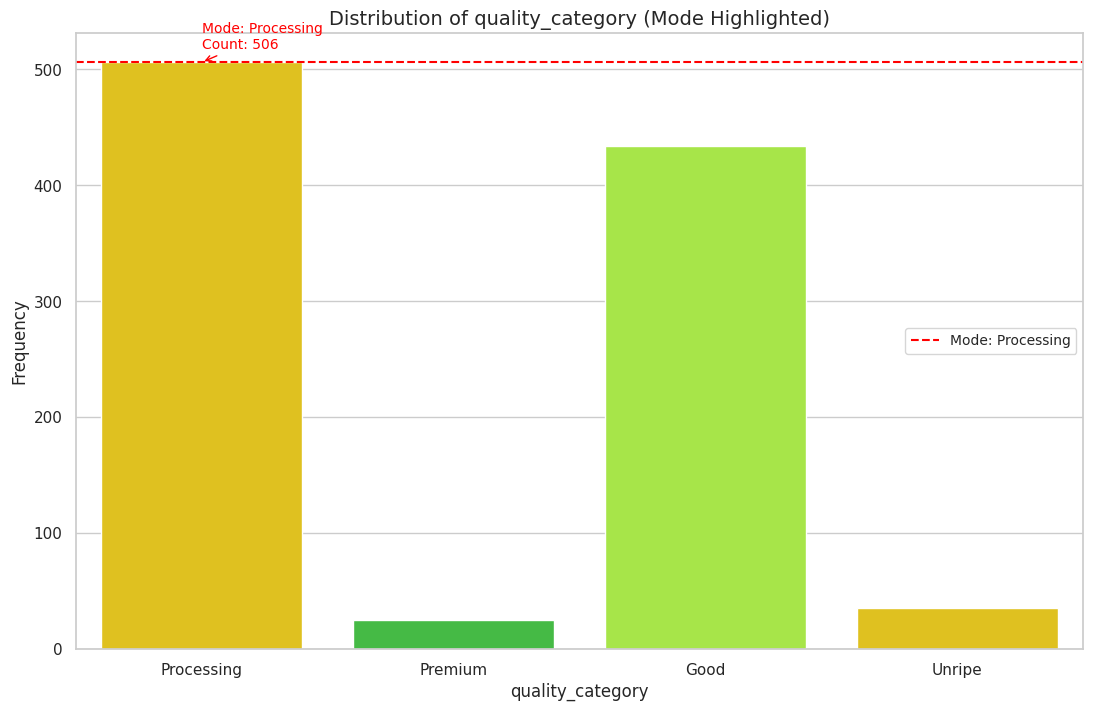

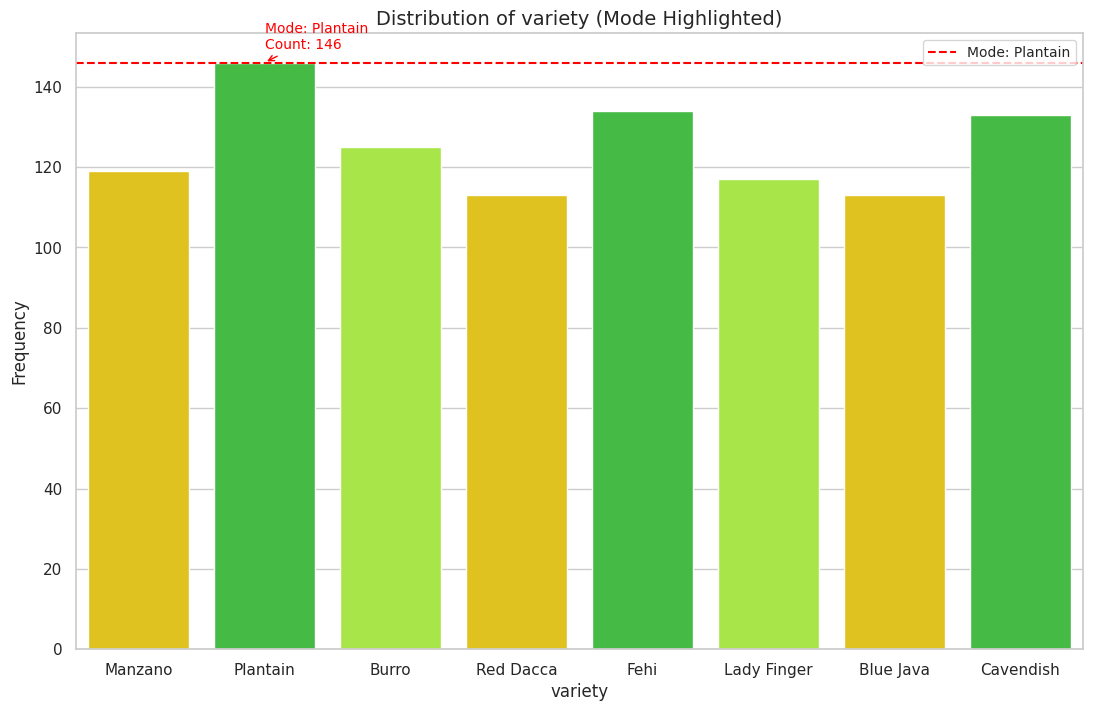

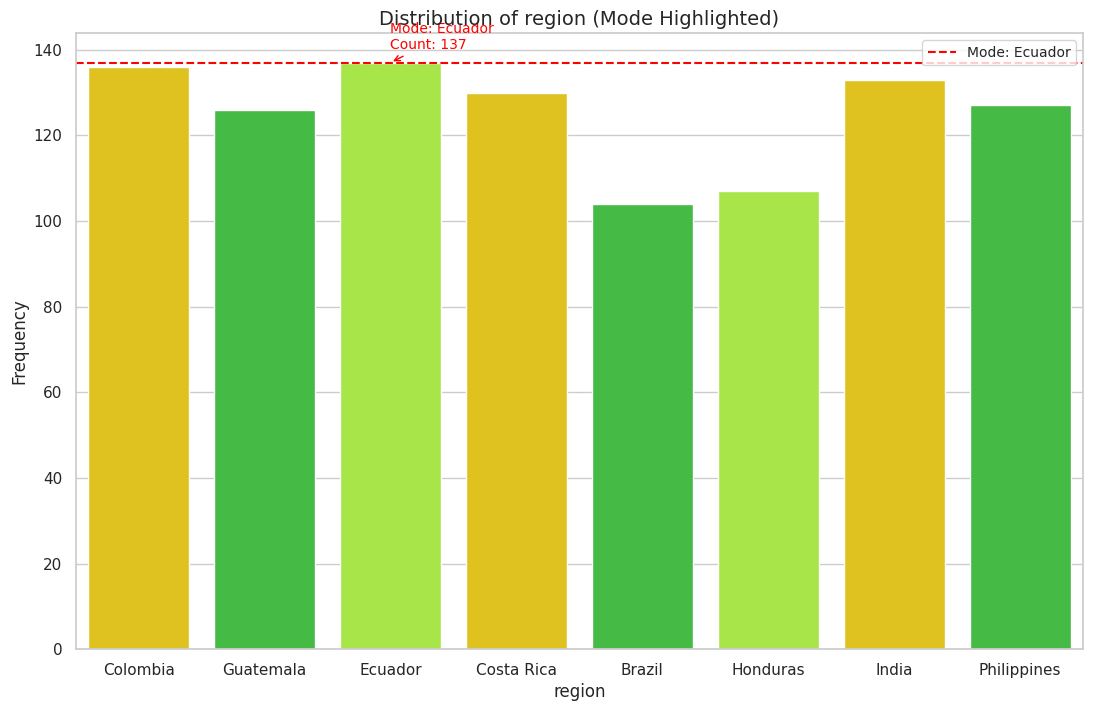

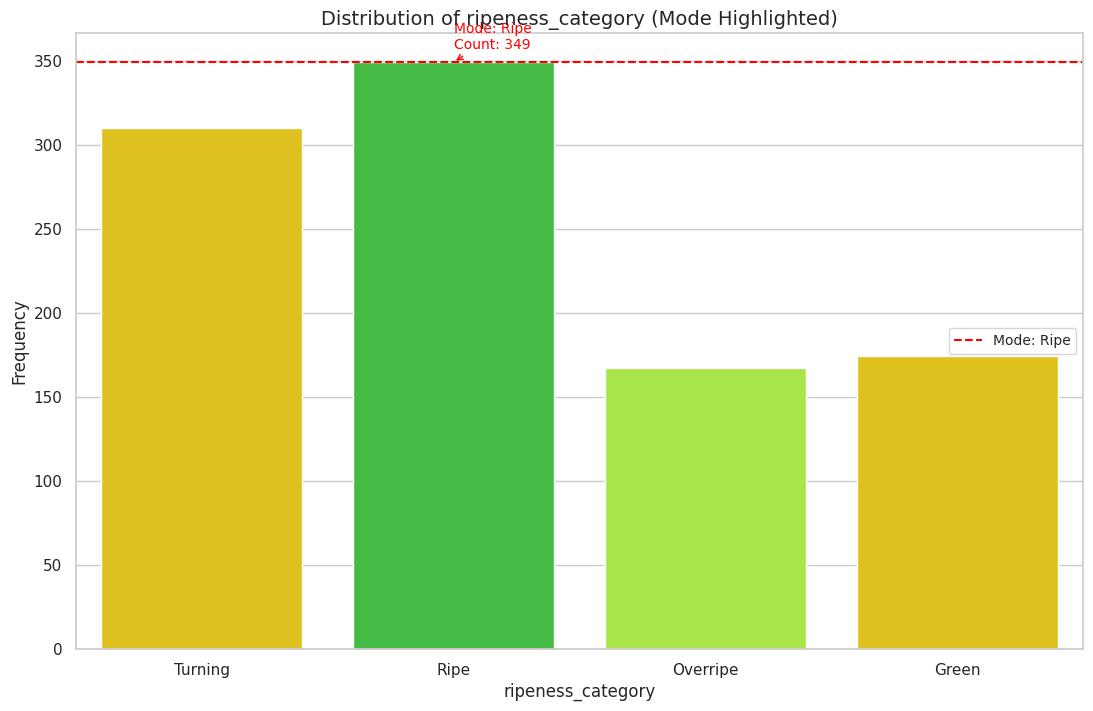

In [11]:
# Categorical Variables: Bar Plot with Mode Highlighted

sns.set_theme(style="whitegrid")
banana_colors = ["#FFD700", "#32CD32", "#ADFF2F"]

for col in ['quality_category', 'variety', 'region', 'ripeness_category']:
    mode_value = banana_df[col].mode()[0]
    plt.figure(figsize=(13, 8))
    sns.countplot(data=banana_df, x=col, palette=banana_colors)
    count = banana_df[col].value_counts()[mode_value]
    plt.axhline(count, color='red', linestyle='--', label=f'Mode: {mode_value}')
    plt.title(f'Distribution of {col} (Mode Highlighted)', fontsize=14)
    plt.xlabel(f"{col}", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.legend(fontsize=10)
    plt.annotate(f"Mode: {mode_value}\nCount: {count}",
                 xy=(banana_df[col].value_counts().idxmax(), count), 
                 xytext=(0, 10), textcoords='offset points', 
                 arrowprops=dict(arrowstyle="->", color='red'),
                 color='red', fontsize=10)
    plt.show()



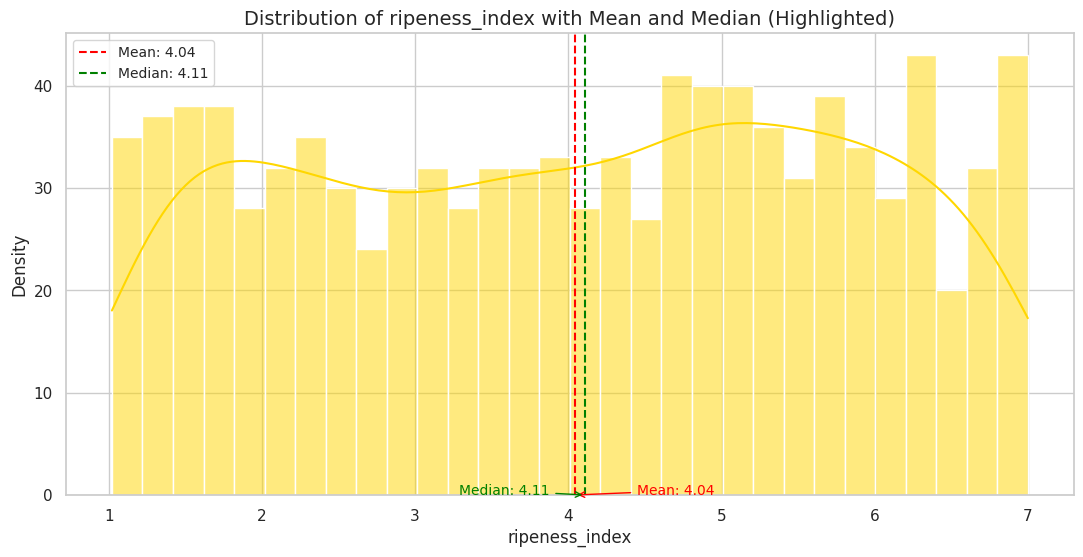

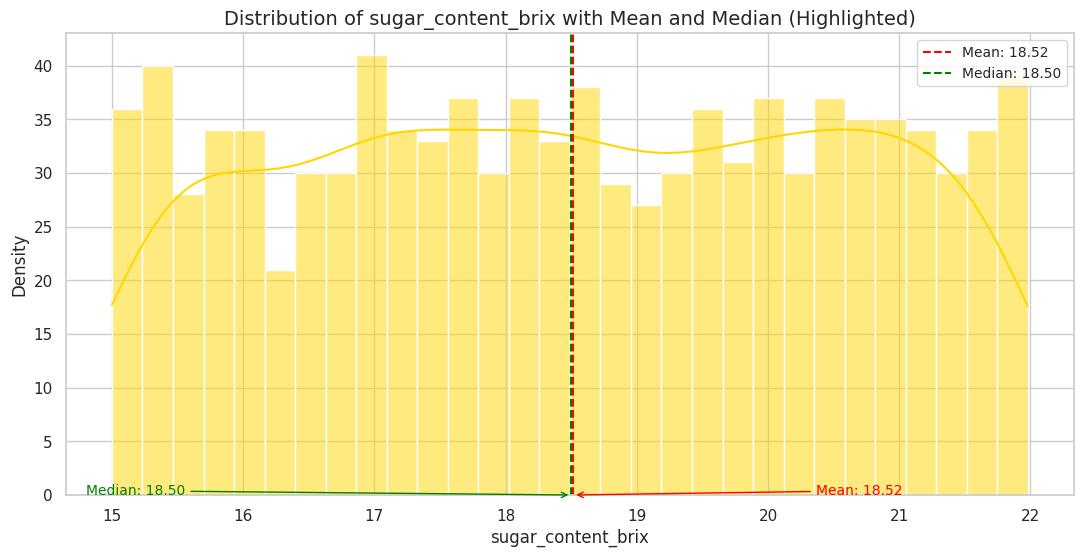

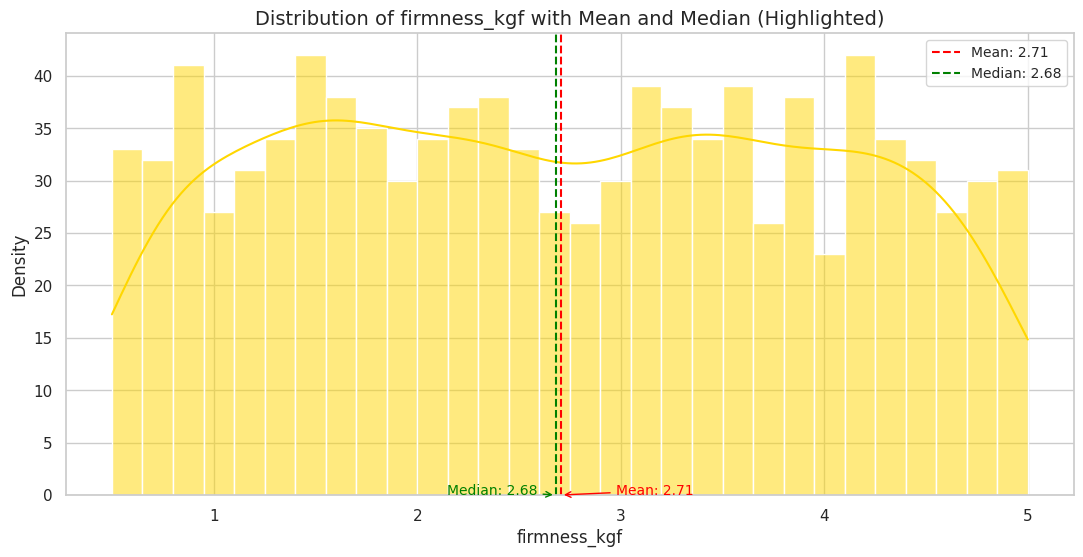

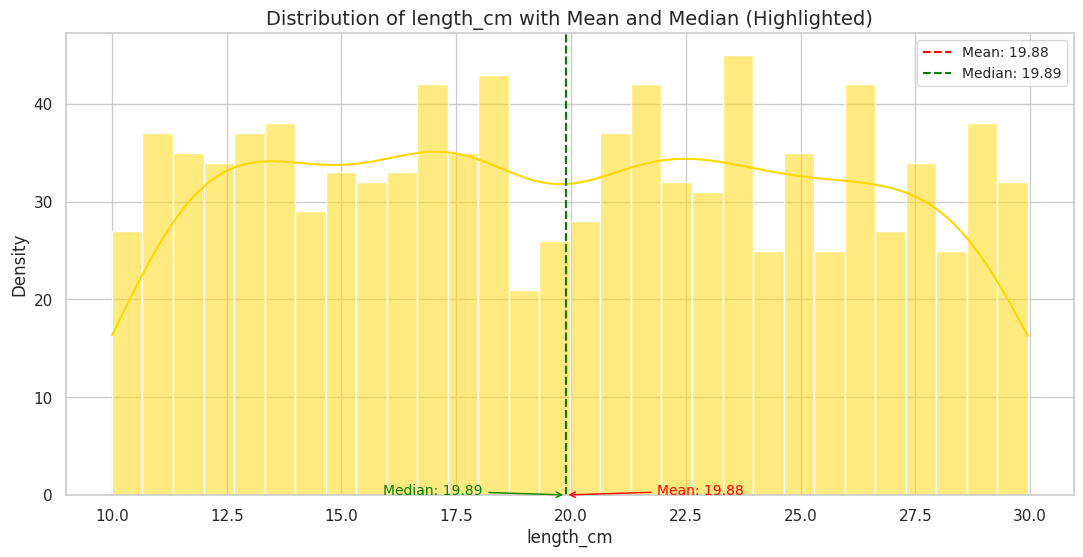

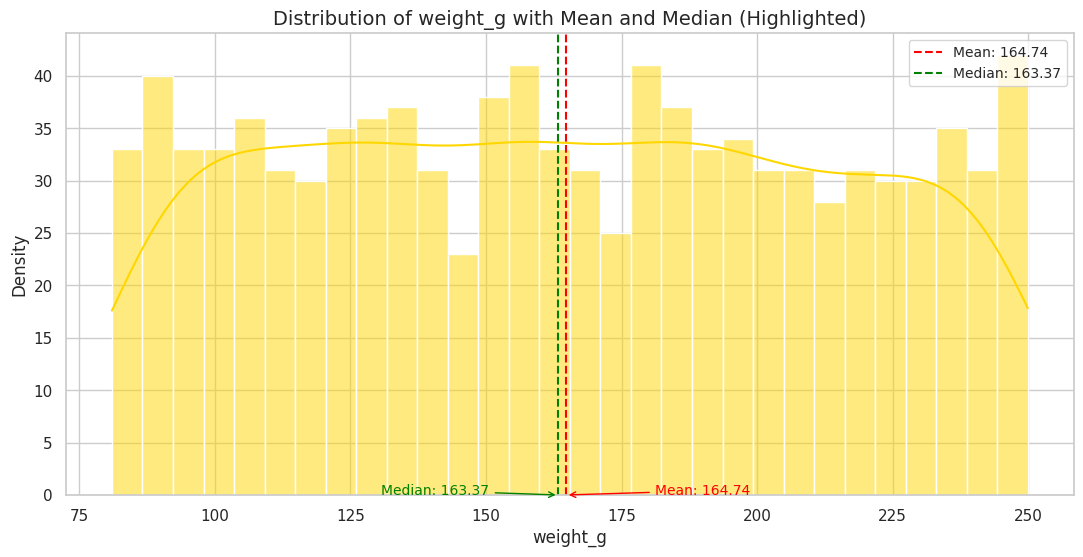

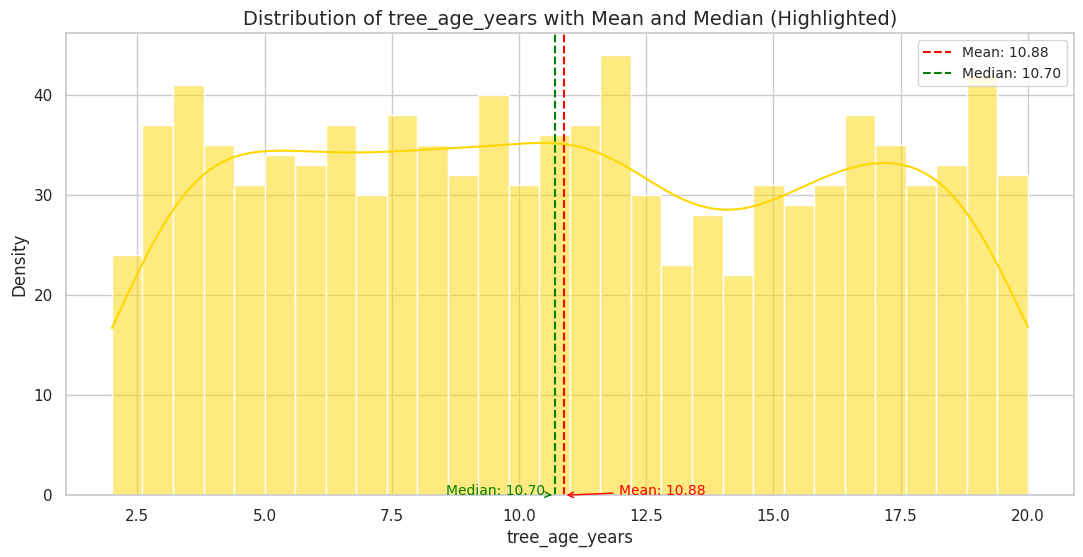

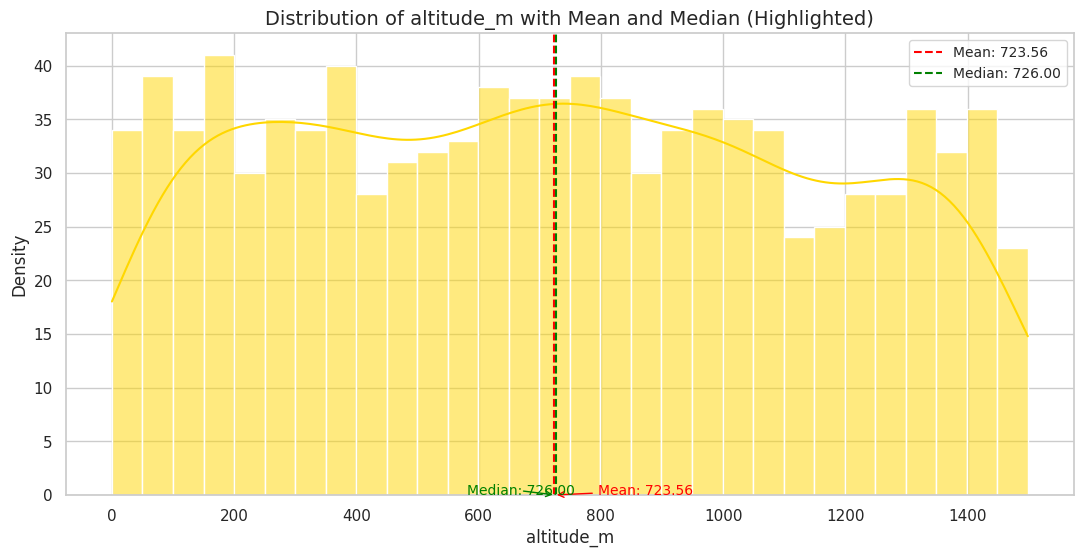

In [12]:
# Numerical Variables: Histogram with Annotated Mean and Median
num_vars = ['ripeness_index', 'sugar_content_brix', 'firmness_kgf', 'length_cm', 'weight_g', 'tree_age_years', 'altitude_m']
for col in num_vars:
    plt.figure(figsize=(13, 6))
    sns.histplot(banana_df[col], kde=True, bins=30, color='#FFD700')
    mean_val = banana_df[col].mean()
    median_val = banana_df[col].median()
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')
    plt.title(f'Distribution of {col} with Mean and Median (Highlighted)', fontsize=14)
    plt.xlabel(f"{col}", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend(fontsize=10)
    plt.annotate(f"Mean: {mean_val:.2f}", xy=(mean_val, 0), xytext=(mean_val + mean_val * 0.1, 0.02),
                 arrowprops=dict(arrowstyle="->", color='red'), color='red', fontsize=10)
    plt.annotate(f"Median: {median_val:.2f}", xy=(median_val, 0), xytext=(median_val - median_val * 0.2, 0.02),
                 arrowprops=dict(arrowstyle="->", color='green'), color='green', fontsize=10)
    plt.show()

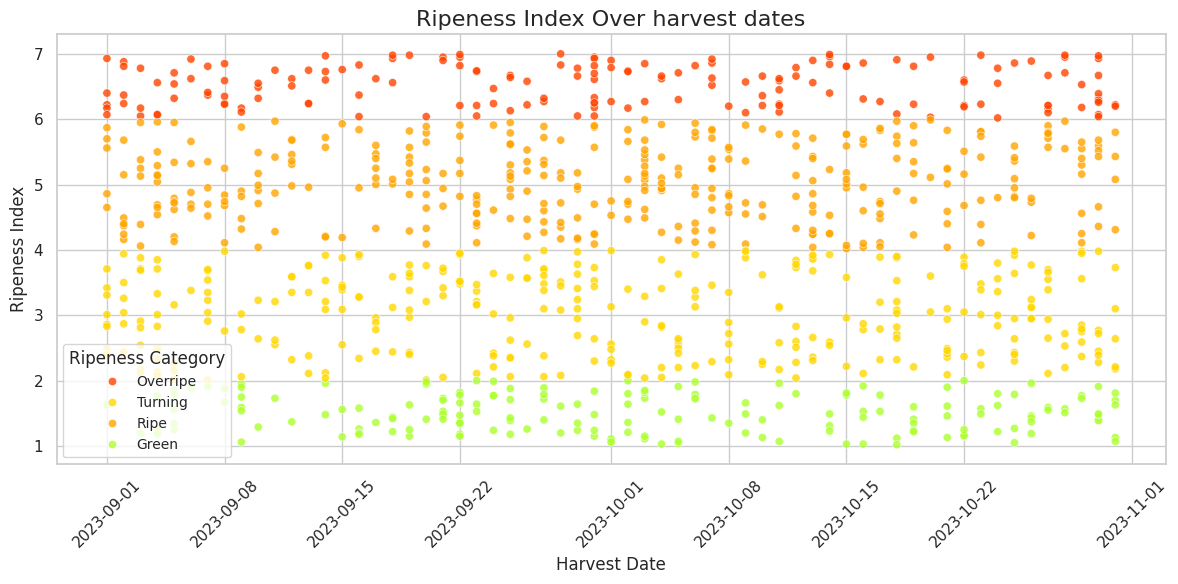

In [13]:
#Time series table for ripeness index over time of the harvest dates

banana_df['harvest_date'] = pd.to_datetime(banana_df['harvest_date'])

# Sort data by harvest_date
banana_df = banana_df.sort_values('harvest_date')

# Plot ripeness index over harvest date
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=banana_df,
    x='harvest_date',
    y='ripeness_index',
    hue='ripeness_category',
    palette={
        'Green': '#ADFF2F',
        'Turning': '#FFD700',
        'Ripe': '#FFA500',
        'Overripe': '#FF4500'
    },
    alpha=0.8,
    sizes=(50, 200),
    legend='full'
)
plt.title('Ripeness Index Over harvest dates', fontsize=16)
plt.xlabel('Harvest Date', fontsize=12)
plt.ylabel('Ripeness Index', fontsize=12)
plt.legend(title='Ripeness Category', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



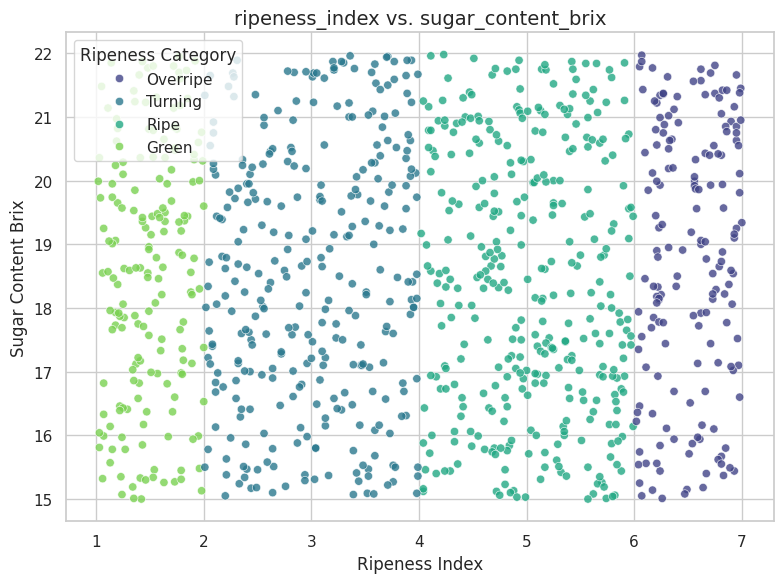

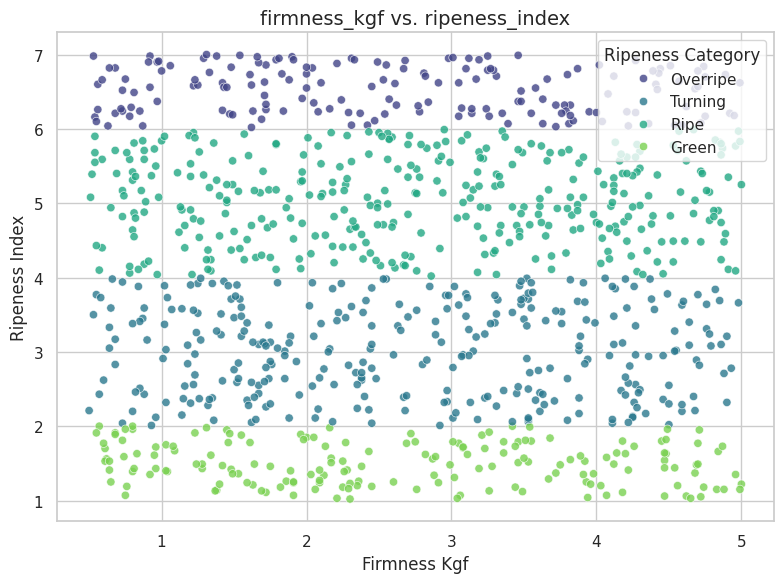

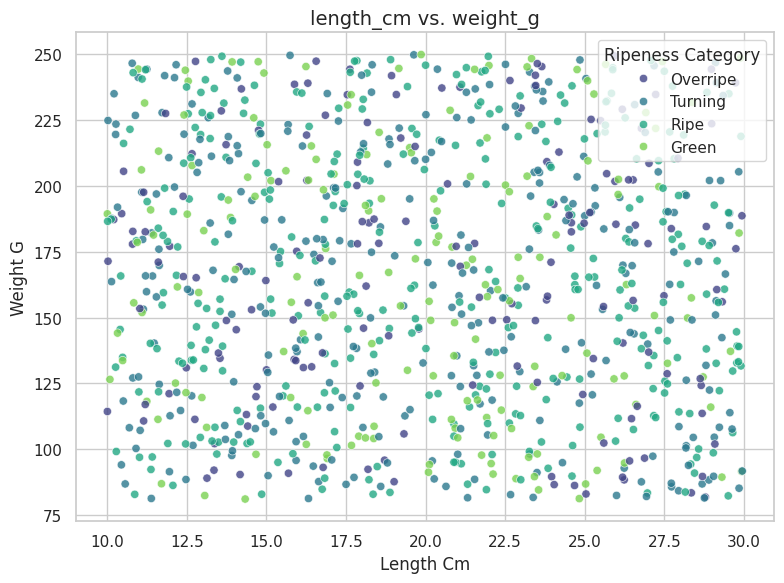

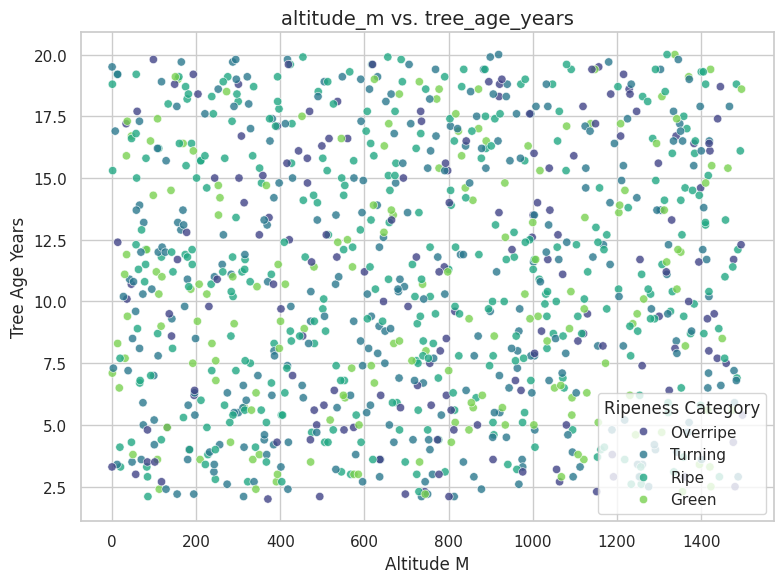

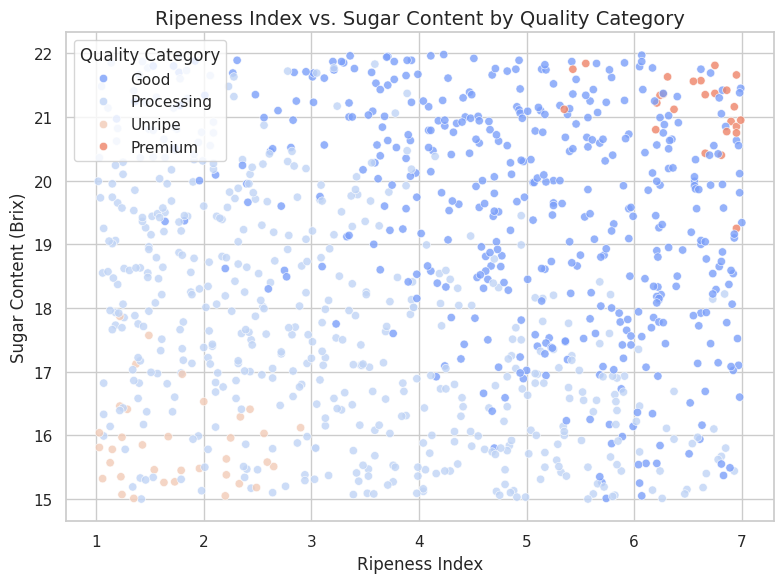

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical variable scatterplots
numerical_pairs = [
    ('ripeness_index', 'sugar_content_brix'),
    ('firmness_kgf', 'ripeness_index'),
    ('length_cm', 'weight_g'),
    ('altitude_m', 'tree_age_years')
]

for x, y in numerical_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=banana_df, x=x, y=y, hue='ripeness_category', palette='viridis', alpha=0.8)
    plt.title(f'{x} vs. {y}', fontsize=14)
    plt.xlabel(x.replace('_', ' ').title(), fontsize=12)
    plt.ylabel(y.replace('_', ' ').title(), fontsize=12)
    plt.legend(title='Ripeness Category')
    plt.tight_layout()
    plt.show()

# Categorical influence on numerical scatterplots
plt.figure(figsize=(8, 6))
sns.scatterplot(data=banana_df, x='ripeness_index', y='sugar_content_brix', hue='quality_category', palette='coolwarm', alpha=0.8)
plt.title('Ripeness Index vs. Sugar Content by Quality Category', fontsize=14)
plt.xlabel('Ripeness Index', fontsize=12)
plt.ylabel('Sugar Content (Brix)', fontsize=12)
plt.legend(title='Quality Category')
plt.tight_layout()
plt.show()


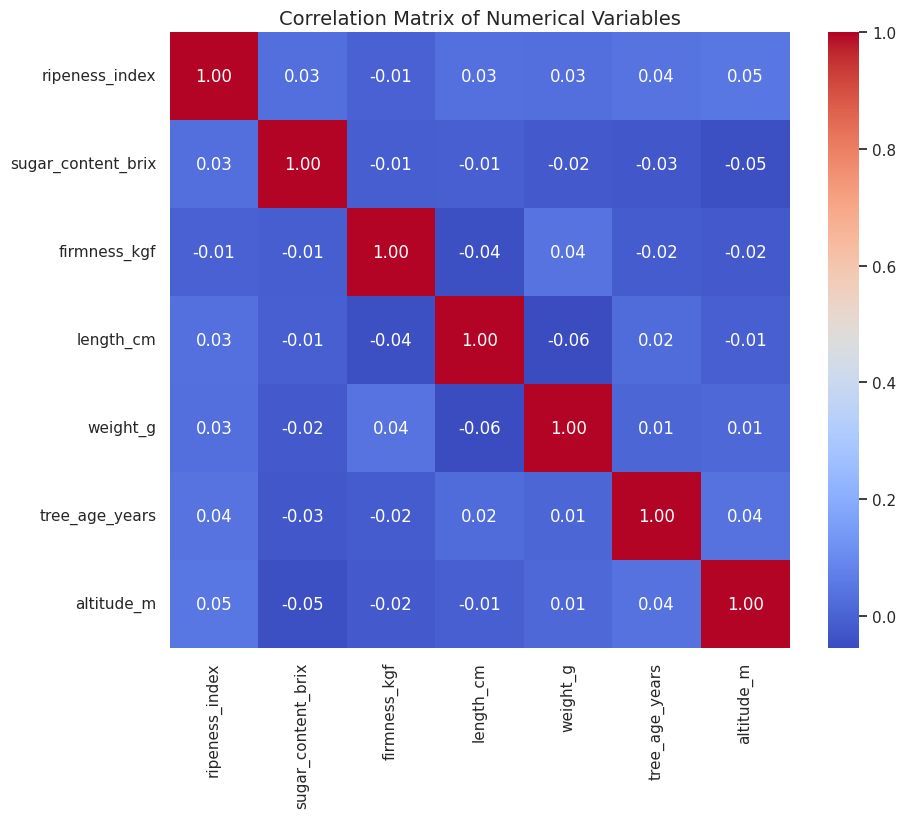

In [15]:
# Correlation matrix for numerical variables
numerical_vars = ['ripeness_index', 'sugar_content_brix', 'firmness_kgf', 'length_cm', 'weight_g', 'tree_age_years', 'altitude_m']
correlation_matrix = banana_df[numerical_vars].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numerical Variables', fontsize=14)
plt.show()


In performing exploratory data analysis (EDA) for the banana dataset, a key insight emerges from the weak correlations between the numerical variables. The correlation coefficients between most pairs of numerical features are extremely low, none exceeding 0.06, which suggests that there is minimal linear relationship between these variables. This indicates that the features are largely independent of one another, or that non-linear relationships exist.

We performed density curve visualizations for each individual numerical variable, and in all cases, the mean and median were close to each other. This indicates minimal skewness, with no strong outliers significantly affecting the data. Additionally, the time series analysis of the harvest_date revealed that the majority of bananas were categorized as either "ripe" or "turning," with "unripe" and "overripe" categories being much less common. This suggests that bananas are typically harvested at later stages of ripeness, and the harvest_date does not play a big role in determining the ripeness category and quality category because there is what looks to be an even distribution of the different types of bananas, no matter what the harvest date is.

## Data Analytics <a class="anchor" id="data-analytics"></a>

- Determine the need for a supervised or unsupervised learning method and identify dependent and independent variables
- Choose and provide reasoning for the selected metric or metrics employed to assess your model.
- Train, test, cross validate, and provide performance metrics for model results
- Try multiple different types of algorithms to determine the best model for your dataset
- Analyze your model performance

This classification task involves us trying to predict the quality of bananas as our target variable which could fall into four categories:
    - Unripe
    - Processing
    - Premium
    - Good

In supervised learning, we have input features which are our independent variables as well as labeled target variables as our output labels that are associated. The model then learns patterns and relationships from the training set on how to map the independent variables/input features to their corresponding dependent variable/output label.

In our Banana Quality dataset, we are provided this labeled data, we have both the independent and dependent variables labeled for the instances which is why it is to be tackled from a supervised learning approach.

Dependent variable:
    - quality_category

Independent variable:
    - variety
    - region
    - ripeness_index
    - ripeness_category
    - sugar_content_brix
    - firmness_kgf
    - length_cm
    - weight_g
    - tree_age_years
    - altitude_m
    - rainfall_mm
    - soil_nitrogen_ppm

    Excluded:
        - quality_category -> dependent variable we are trying to predict
        - harvest_date -> datetime incompatible predictor
        - sample_id -> an identifier of unique bananas so it provides no predictive value


Evaluation Metrics:

1. Accuracy - Widely used metric for classification tasks. It provides the ratio of correctly predicted instances against total instances which gives a good snapchat and general overview of our model's performance.
2. F1-Score - The mean of precision and recall. Precision measures how many positive predictions were actually correct while recall measures how many positive instances were correctly identified. In other words, the higher our F1-Score, the better our model is at correctly identifying positive cases while minimizing false positives/false negatives. It gives a more detailed and comprehensive picture then accuracy does.
3. Confusion Matrix - Provides us with the proportions of true positive, true negative, false positive, and false negative predictions. Visualization for greater analysis of misclassifications.
4. Learning Curve - Plot displaying the model's performance on both the training and testing sets against the number of training samples. Helps diagnose issues of overfitting or underfitting along with how well the model generalizes to unseen. Can provide insights into whether increasing training size or model complexity will offer enhance capabilities and improve predictive power.

In [16]:
# Train-Test Split

x = cleaned_banana_df.drop(['quality_category', 'harvest_date', 'sample_id'], axis = 1)
y = cleaned_banana_df['quality_category']

print(f'Independent Variables:\n{x.head()}\n')
print(f'Dependent Variable:\n{y.head()}')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Independent Variables:
   variety  region  ripeness_index  ripeness_category  sugar_content_brix  \
0        5       1            2.11                  3               16.83   
1        6       4            4.25                  2               16.73   
2        1       3            6.24                  1               21.34   
3        5       3            5.39                  2               16.75   
4        7       3            5.84                  2               16.90   

   firmness_kgf  length_cm  weight_g  tree_age_years  altitude_m  rainfall_mm  \
0          3.53      21.44    146.92            13.7        58.2       2440.5   
1          4.09      26.11    160.48             5.1       280.2       2374.6   
2          1.63      25.20    225.27            17.7      1246.9       1191.5   
3          3.31      13.08    137.80            13.0      1150.2       2845.1   
4          3.07      12.98    227.84             4.8       526.0       2136.9   

   soil_nitrogen_ppm  
0   

In [17]:
def perform_cross_validation(model, x, y, cv=10):
    """
    Perform k-fold (default 5) cross validation on the given model and return its accuracy performance scores

    Parameters:

        model: trained ML model
        x, y: train-test split to perform CV on
        cv: number of folds for CV to execute

    Returns:

        Accuracy performance scores across the k folds
    """
    cv_scores = cross_val_score(model, x, y, cv = cv, scoring = 'accuracy')
    
    return cv_scores

In [18]:
def plot_learning_curve(model, x, y, title="Learning Curve"):
    """
    Plot learning curve for given model to visualize performance trend against data size changes

    Parameters:

        model: trained ML model to evaluate
        x,y: train-test split to perform CV on
        title: name of the model for plot title
    """
    train_sizes, train_scores, val_scores = learning_curve(
        model, x, y, cv=3, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 5))
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
    plt.plot(train_sizes, val_scores.mean(axis=1), label='Cross Validation Score')
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

In [19]:
def plot_confusion_matrix(y_true, y_pred, labels, title="Confusion Matrix"):
    """
    Plot confusion matrix for model predictions
    
    Parameters:

        y_true : true labels
        y_pred : predicted labels
        title : name of the model for plot title
    """
    plt.figure(figsize=(15, 15))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot = True, fmt='d', cmap='Blues',
                xticklabels = labels,
                yticklabels = labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [20]:
# Random Forest hyperparameter tuning

param_grid_rf = {
    'n_estimators': [5, 10, 30, 50],
    'max_depth': [None, 10, 20],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 4, 6]
}

rf_model = RandomForestClassifier(random_state=0)

rf_grid_search = GridSearchCV(
    estimator = rf_model,
    param_grid = param_grid_rf,
    cv = 5,
    scoring = 'accuracy'
)
rf_grid_search.fit(x_train, y_train)

print("Best parameters found:", rf_grid_search.best_params_)

Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


Classification Report:
              precision    recall  f1-score   support

        Good       0.89      0.85      0.87        96
  Processing       1.00      0.40      0.57         5
      Unripe       0.84      0.93      0.88        94
     Premium       1.00      0.40      0.57         5

    accuracy                           0.86       200
   macro avg       0.93      0.64      0.72       200
weighted avg       0.87      0.86      0.86       200

Cross Validation scores: [0.8625 0.925  0.8875 0.875  0.9    0.8625 0.8    0.85   0.8375 0.8625]
Mean CV Score: 0.8663
CV Standard Deviation: 0.0326


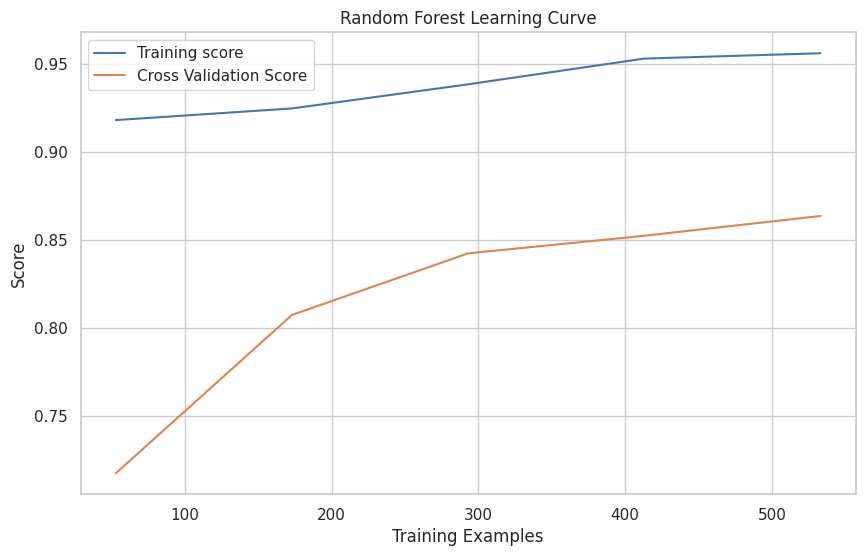

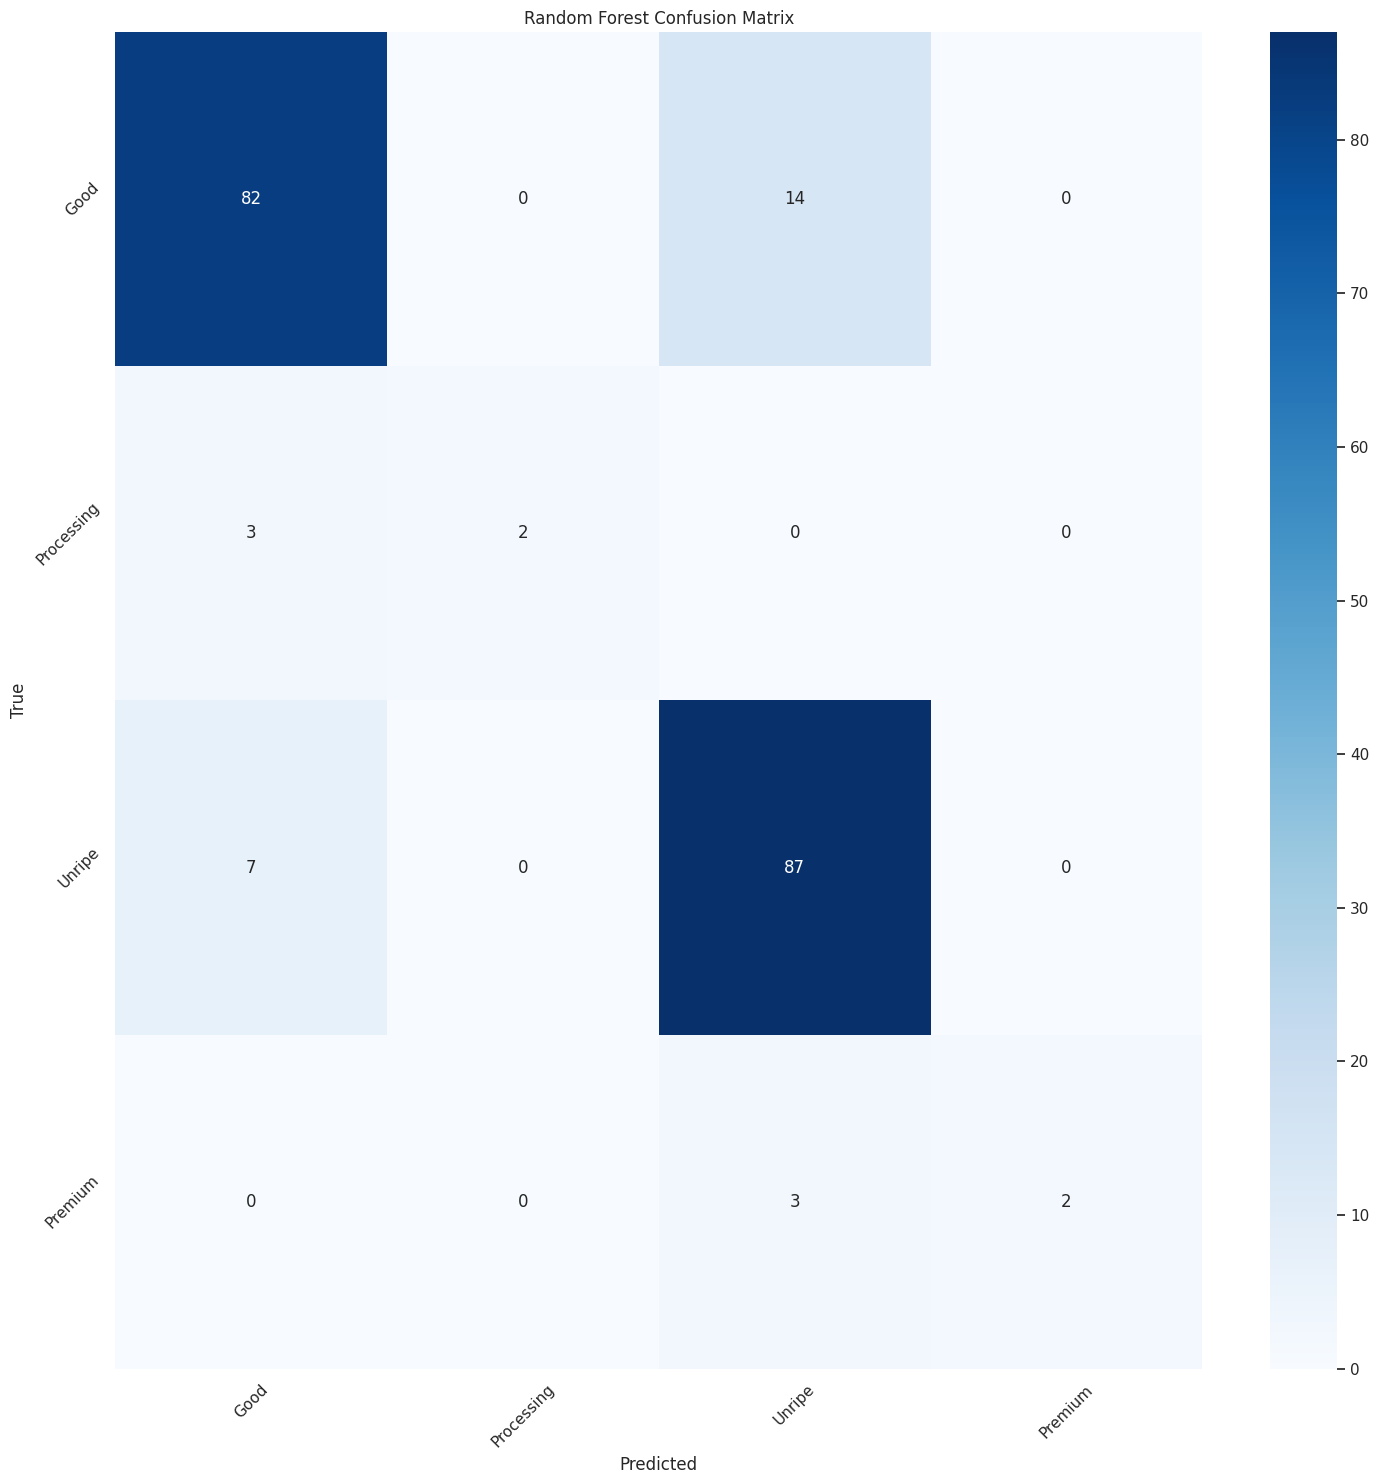

In [26]:
# Tuned RF

tuned_rf = rf_grid_search.best_estimator_
rf_predictions = tuned_rf.predict(x_test)

#Performance of tuned RF

print('Classification Report:')

target_names_converted  = banana_df['quality_category'].unique()

print(classification_report(y_test, rf_predictions, target_names = target_names_converted))

CV_scores = perform_cross_validation(tuned_rf, x_train, y_train)
print(f"Cross Validation scores: {CV_scores}")
print(f"Mean CV Score: {np.mean(CV_scores):.4f}\nCV Standard Deviation: {np.std(CV_scores):.4f}")

plot_learning_curve(tuned_rf, x_train, y_train, title = 'Random Forest Learning Curve')

plot_confusion_matrix(y_test, rf_predictions, target_names_converted, 'Random Forest Confusion Matrix')

In [22]:
# K-Nearest Neighbors hyperparameter tuning

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

param_grid_knn = {
    'n_neighbors': [5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

kNN_model = KNeighborsClassifier()

kNN_grid_search = GridSearchCV(
    estimator = kNN_model,
    param_grid = param_grid_knn,
    cv = 5,
    scoring = 'accuracy'
)

kNN_grid_search.fit(x_train_scaled, y_train)

print("Best parameters found:", kNN_grid_search.best_params_)


Best parameters found: {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}


Classification Report:
              precision    recall  f1-score   support

        Good       0.86      0.85      0.86        96
  Processing       0.00      0.00      0.00         5
      Unripe       0.83      0.91      0.87        94
     Premium       1.00      0.40      0.57         5

    accuracy                           0.85       200
   macro avg       0.67      0.54      0.58       200
weighted avg       0.83      0.85      0.84       200

Cross Validation scores: [0.825  0.8875 0.875  0.85   0.875  0.8875 0.8    0.8    0.8375 0.825 ]
Mean CV Score: 0.8463
CV Standard Deviation: 0.0321


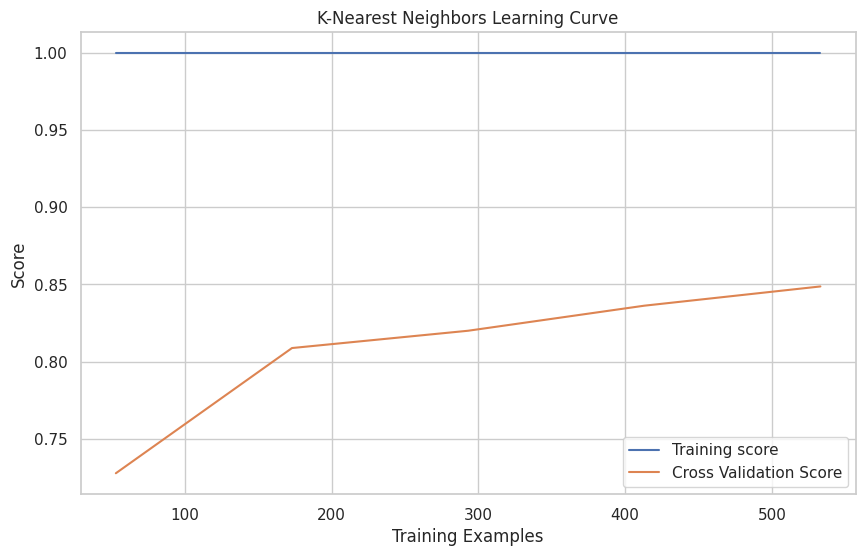

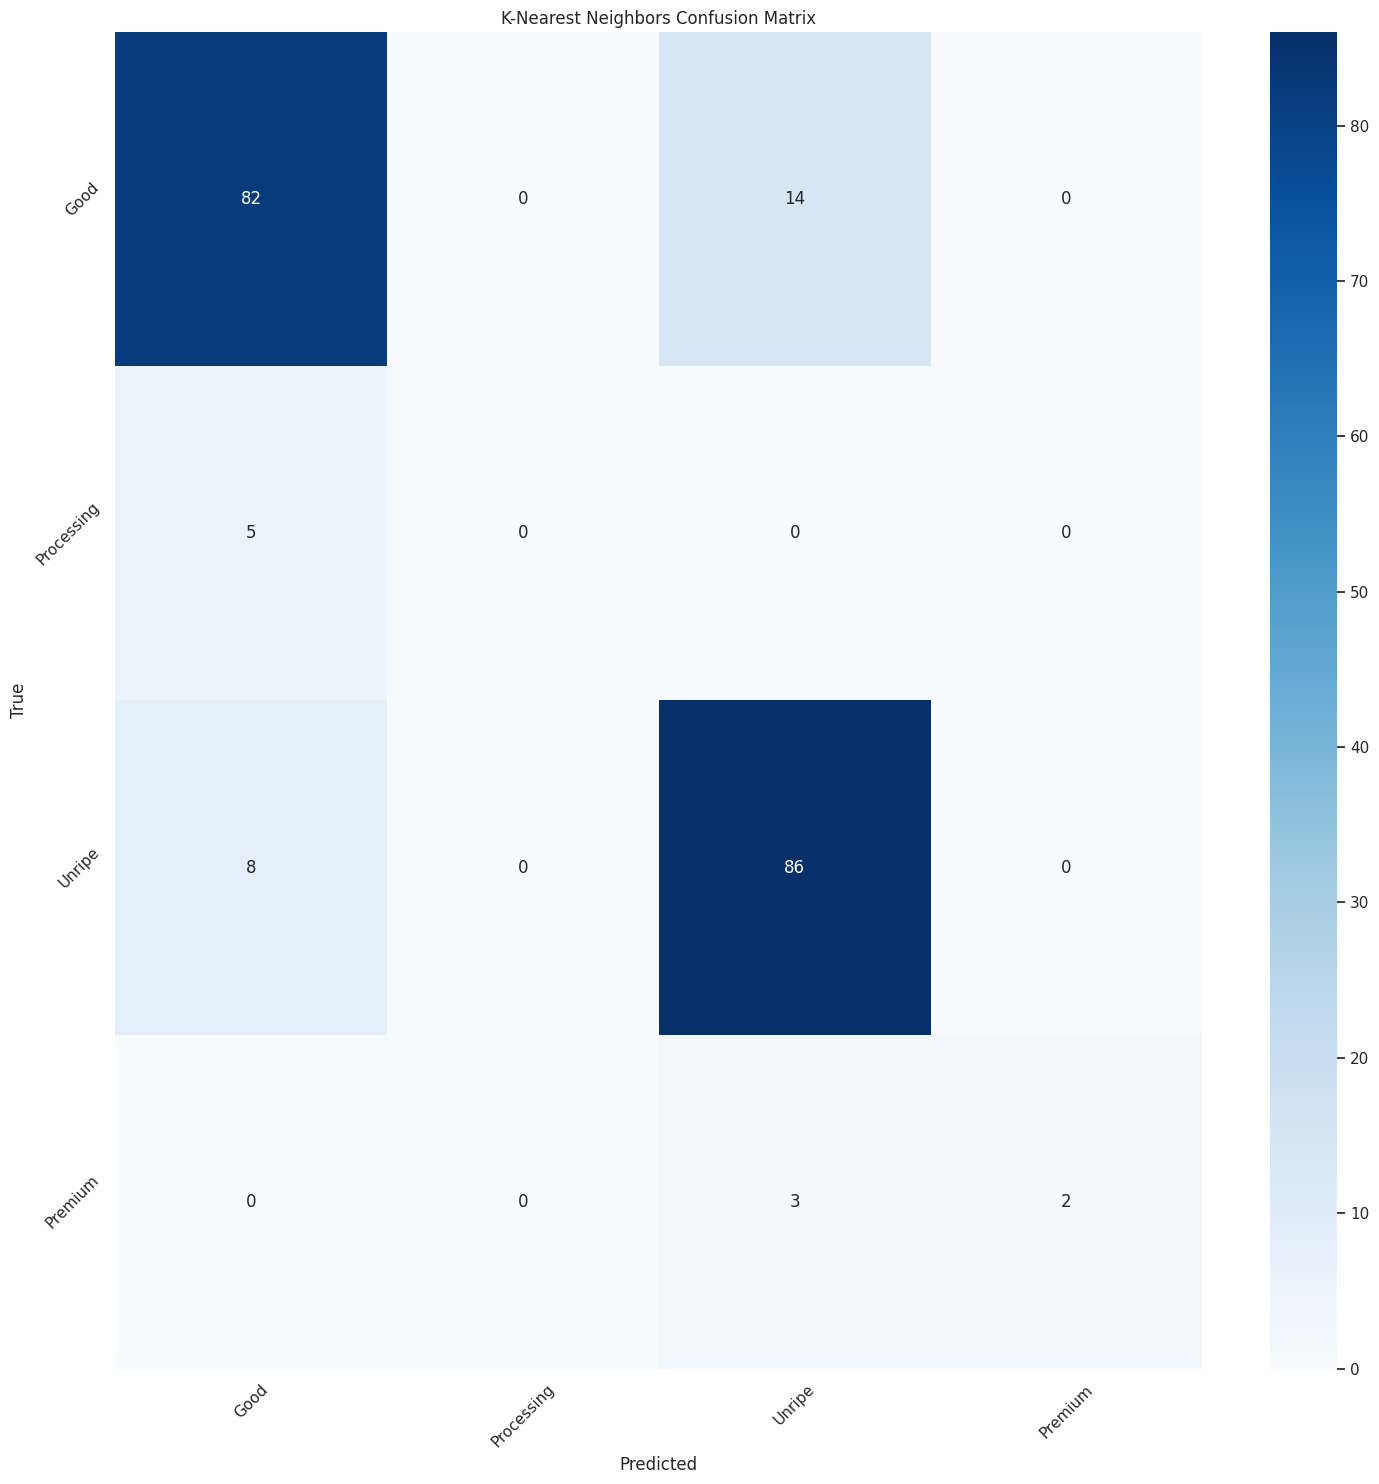

In [23]:
# Tuned kNN

tuned_knn = kNN_grid_search.best_estimator_
kNN_predictions = tuned_knn.predict(x_test_scaled)

#Performance of tuned kNN

print('Classification Report:')
target_names_converted  = banana_df['quality_category'].unique()
print(classification_report(y_test, kNN_predictions, target_names = target_names_converted))

CV_scores = perform_cross_validation(tuned_knn, x_train_scaled, y_train)
print(f"Cross Validation scores: {CV_scores}")
print(f"Mean CV Score: {np.mean(CV_scores):.4f}\nCV Standard Deviation: {np.std(CV_scores):.4f}")

plot_learning_curve(tuned_knn, x_train_scaled, y_train, title = 'K-Nearest Neighbors Learning Curve')

plot_confusion_matrix(y_test, kNN_predictions, target_names_converted, 'K-Nearest Neighbors Confusion Matrix')

In [24]:
# SVM hyperparameter tuning

param_grid_svm = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [.001, .01, .1, 1, 10],
}

svm_model = SVC()

svm_grid_search = GridSearchCV(
    estimator = svm_model,
    param_grid = param_grid_svm,
    cv = 5,
    scoring = 'accuracy'
)

svm_grid_search.fit(x_train_scaled, y_train)

print("Best parameters found:", svm_grid_search.best_params_)

Best parameters found: {'C': 10, 'kernel': 'linear'}


Classification Report:
              precision    recall  f1-score   support

        Good       0.86      0.85      0.86        96
  Processing       0.00      0.00      0.00         5
      Unripe       0.83      0.91      0.87        94
     Premium       1.00      0.40      0.57         5

    accuracy                           0.85       200
   macro avg       0.67      0.54      0.58       200
weighted avg       0.83      0.85      0.84       200

Cross Validation scores: [0.9    0.9125 0.925  0.9    0.8875 0.9125 0.8625 0.85   0.85   0.9125]
Mean CV Score: 0.8912
CV Standard Deviation: 0.0263


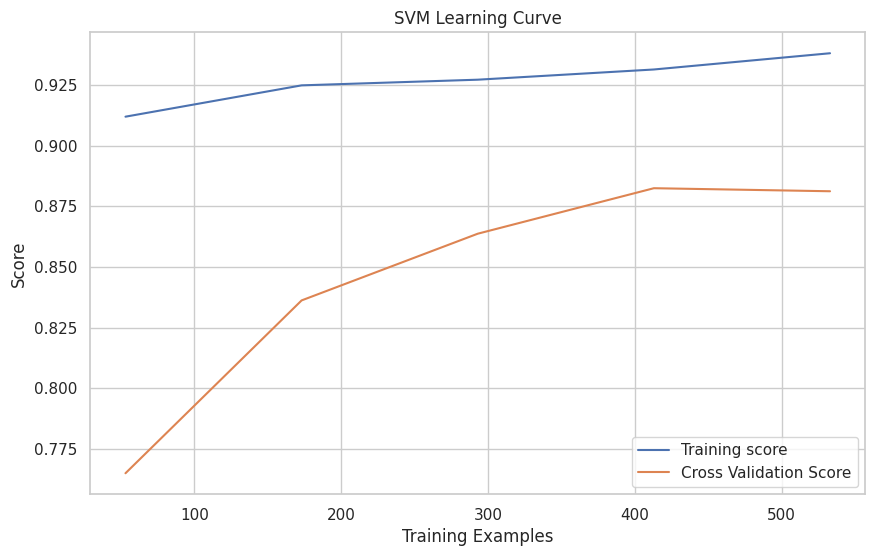

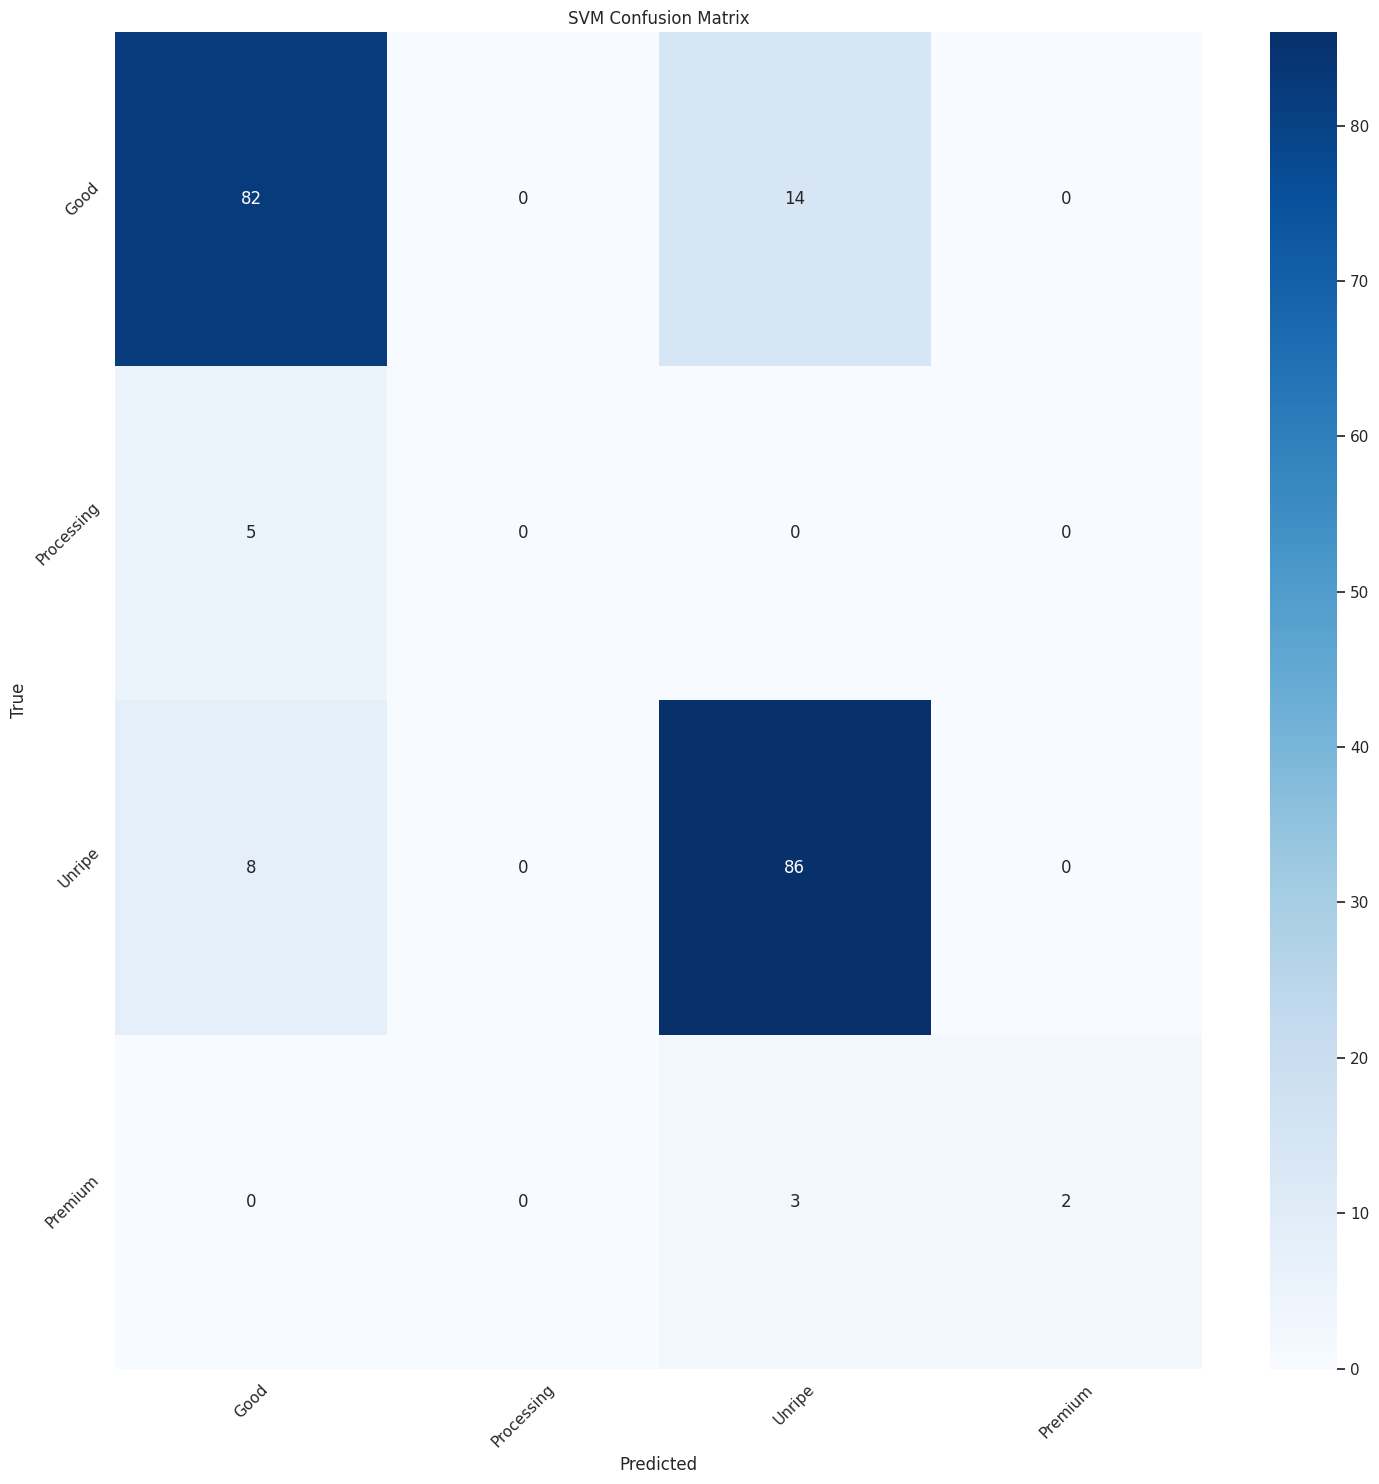

In [25]:
tuned_svm = svm_grid_search.best_estimator_
svm_predictions = tuned_knn.predict(x_test_scaled)

print('Classification Report:')
target_names_converted  = banana_df['quality_category'].unique()
print(classification_report(y_test, svm_predictions, target_names = target_names_converted))

CV_scores = perform_cross_validation(svm_model, x_train_scaled, y_train)
print(f"Cross Validation scores: {CV_scores}")
print(f"Mean CV Score: {np.mean(CV_scores):.4f}\nCV Standard Deviation: {np.std(CV_scores):.4f}")

plot_learning_curve(svm_model, x_train_scaled, y_train, title = 'SVM Learning Curve')

plot_confusion_matrix(y_test, svm_predictions, target_names_converted, 'SVM Confusion Matrix')

We performed hyperparameter tuning on these models via grid search to find the best combination of parameters that balances optimal performance with model complexity.

# Random Forest

The Random Forest model performed very well. As can be viewed in the classification report, it had excellent precision capabilities with good recall for the quality categories of 'good' and 'unripe' while 'processing' and 'premium' struggled in both recall and f1-score. This could be attributed to the low number of training instances resulting in the model struggling to map some relationships and patterns. Across 10 folds, the model was consistent in performance around 86% meaning it generalized fairly well to unseen data but there was a disparaity between this training score and cross-validation score of ~ 10% which could indicate some slight signs of overfitting. The confusiong matrix supports this interpretation, it did well with quality categories of 'good' and 'unripe' but sometimes confused the two in its prediction potentially indicating similar physical features and characteristics between these two categories.

# K-Nearest Neighbors

The K-Nearest Neighbors model performed slightly worse than the Random Forest with an accuracy of 83%. The optimal parameters out of the searched options were {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}. Referencing the learning curve, the model appeared to fit the data well since there was just a small gap between the training score and cross validation score as training samples increased. The model did struggle with the 'processing' quality category once again, potentially due to the low training size. It generalized well but did struggle with diversifying the 'good' and 'unripe' quality categories.

# Support Vector Machine

The Support Vector Machine model performed slightly worse than the Random Forest model with an accuracy of 85%. The optimal parameters found out of the provided options were {'C': 10, 'kernel': 'linear'}. The C value of 10 shows that the model found better results when increasing complexity and prioritizing classification. This most likely means that the data points for different classes are close together, requiring a precise boundary. A linear kernel shows that the data has some degree of linear separability. It had a mean cross validation score of 89% showing that the model generalizes well. The decision matrix shows that same issues as the previous models, once again most likely due to the low size of the data.

Due to the small dataset size of only 1000 instances, there were issues with the models memorizing the training along with its relationships and patterns. This problem was attempted to be solved by grid search and hyperparameter tuning.